# Data Exploration

In this notebook I describe my data exploration steps.

## Install dependencies

In [44]:
%pip install pandas
%pip install matplotlib
%pip install numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

# Read the SQLite databases
weather = pd.read_sql_query("SELECT * FROM weather", "sqlite:///weather.sqlite")
speed = pd.read_sql_query("SELECT * FROM speed", "sqlite:///speed.sqlite")

### Look at the first rows

In [46]:
weather.head(10)

,date,prcp
0,2017-01-01 00:00:00.000000,3.2
1,2017-01-02 00:00:00.000000,0.4
2,2017-01-03 00:00:00.000000,0.5
3,2017-01-04 00:00:00.000000,5.4
4,2017-01-05 00:00:00.000000,0.0
5,2017-01-06 00:00:00.000000,0.0
6,2017-01-07 00:00:00.000000,2.1
7,2017-01-08 00:00:00.000000,0.1
8,2017-01-09 00:00:00.000000,8.6
9,2017-01-10 00:00:00.000000,1.0


In [47]:
speed.head(10)

,date,excessive_speed
0,2017-01-01 00:00:00.000000,13.0
1,2017-01-01 00:00:00.000000,16.0
2,2017-01-01 00:00:00.000000,6.0
3,2017-01-01 00:00:00.000000,9.0
4,2017-01-01 00:00:00.000000,10.0
5,2017-01-01 00:00:00.000000,18.0
6,2017-01-01 00:00:00.000000,10.0
7,2017-01-01 00:00:00.000000,10.0
8,2017-01-01 00:00:00.000000,6.0
9,2017-01-01 00:00:00.000000,14.0


### Data exploration
Print some basic information about the data.

In [48]:
weather.info()

weather['prcp'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1826 non-null   object 
 1   prcp    1826 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


array([3.200e+00, 4.000e-01, 5.000e-01, 5.400e+00, 0.000e+00, 2.100e+00,
       1.000e-01, 8.600e+00, 1.000e+00, 3.000e+00, 1.100e+01, 3.900e+00,
       4.900e+00, 2.800e+00, 2.200e+00, 1.500e+00, 4.300e+00, 2.700e+00,
       3.400e+00, 8.000e-01, 1.200e+00, 6.600e+00, 7.600e+00, 3.700e+00,
       6.900e+00, 7.100e+00, 2.000e-01, 7.400e+00, 5.000e+00, 2.230e+01,
       2.300e+00, 1.800e+01, 3.000e-01, 9.000e-01, 8.000e+00, 1.100e+00,
       6.000e-01, 7.300e+00, 8.400e+00, 6.400e+00, 5.200e+00, 1.400e+00,
       4.100e+00, 5.800e+00, 2.600e+00, 7.000e-01, 2.500e+00, 6.000e+00,
       5.100e+00, 1.460e+01, 9.200e+00, 9.100e+00, 1.800e+00, 4.500e+00,
       9.500e+01, 1.980e+01, 8.900e+00, 1.220e+01, 3.600e+00, 3.800e+00,
       9.000e+00, 1.960e+01, 1.700e+01, 1.700e+00, 2.570e+01, 2.900e+00,
       4.000e+00, 1.600e+00, 1.030e+01, 3.300e+00, 2.000e+00, 8.100e+00,
       6.500e+00, 1.160e+01, 4.700e+00, 6.100e+00, 1.290e+01, 2.400e+00,
       9.800e+00, 1.300e+00, 5.900e+00, 6.300e+00, 

In [49]:
speed.info()

speed['excessive_speed'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2932311 entries, 0 to 2932310
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   excessive_speed  float64
dtypes: float64(1), object(1)
memory usage: 44.7+ MB


array([ 13.,  16.,   6.,   9.,  10.,  18.,  14.,  43.,  29.,  11.,  25.,
         7.,  22.,   8.,   5.,  12.,  17.,  15.,  19.,  35.,  34.,  20.,
        26.,  21.,  23.,  30.,  38.,  24.,  33.,  37.,  54.,  31.,  28.,
        49.,  32.,  27.,  41.,  42.,  36.,  39.,  40.,  48.,  50.,  67.,
        61.,  46.,  57.,  45.,  58.,  44.,  86.,  47.,  94.,  59.,  70.,
        52.,  51.,  71.,  53.,  nan,  74.,  75.,  81.,  82.,  64.,  69.,
        56.,  55.,  65., 100.,  66.,  60.,  97.,  73.,  63.,  72.,  90.,
        78.,  62.,  80.,  83.,  68.,  77.,  91.,  85.,  84.,  89.,   0.,
         2.,   4.,   1.,   3., 101., 106., 110.,  79., 105.,  88.,  96.,
        87.,  98.,  76., 114.,  99., 103., 171., 104.,  95., 133., 111.,
        92., 102.,  93., 108., 107., 115., 112., 109., 121., 147., 118.,
       117., 113., 141., 156., 129., 122., 120., 116., 128., 127., 148.,
       144., 124., 119., 136., 134., 142., 126., 132., 123., 135., 125.,
       168., 161., 131., 201., 137., 130., 173., 13

### Data Manipulation

Merge the data based on the date

In [50]:
merged_data = pd.merge(weather, speed, on='date', how='inner')

Calculation of the Total Speed Limit Violation Amount per Day

In [51]:
daily_total_overspeed = merged_data.groupby('date')['excessive_speed'].sum()

### Visualization

Plot of the Total Speed Limit Violation per Day

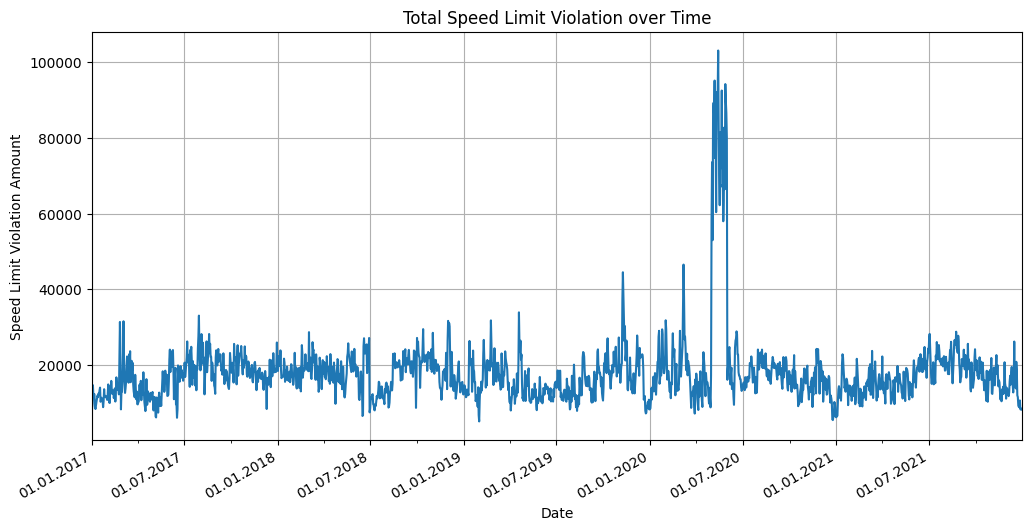

In [52]:
plt.figure(figsize=(12, 6))

# Convert the index to datetime if needed
daily_total_overspeed.index = pd.to_datetime(daily_total_overspeed.index)

daily_total_overspeed.plot()
plt.title('Total Speed Limit Violation over Time')
plt.xlabel('Date')
plt.ylabel('Speed Limit Violation Amount')
plt.grid(True)

# Set the locator and formatter for x-axis tick labels
locator = mdates.MonthLocator(interval=6)
formatter = mdates.DateFormatter('%d.%m.%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels

plt.show()

Plot of Precipitation per Day

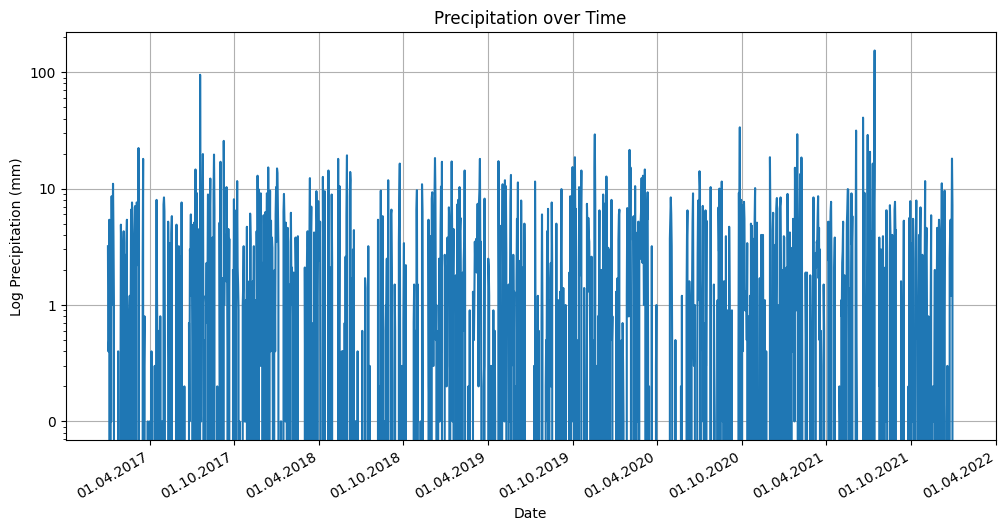

In [53]:
plt.figure(figsize=(12, 6))
weather['date'] = pd.to_datetime(weather['date'])  # Convert date format

plt.plot(weather['date'], weather['prcp'])
locator = mdates.MonthLocator(interval=6)  # Every 6 months
plt.gca().xaxis.set_major_locator(locator)

# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels

plt.yscale('log')  # Set y-axis scale to logarithmic

# Customize y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(ticker.NullFormatter())

# Set y-axis label
plt.ylabel('Log Precipitation (mm)')

plt.title('Precipitation over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


Correlation Calculation

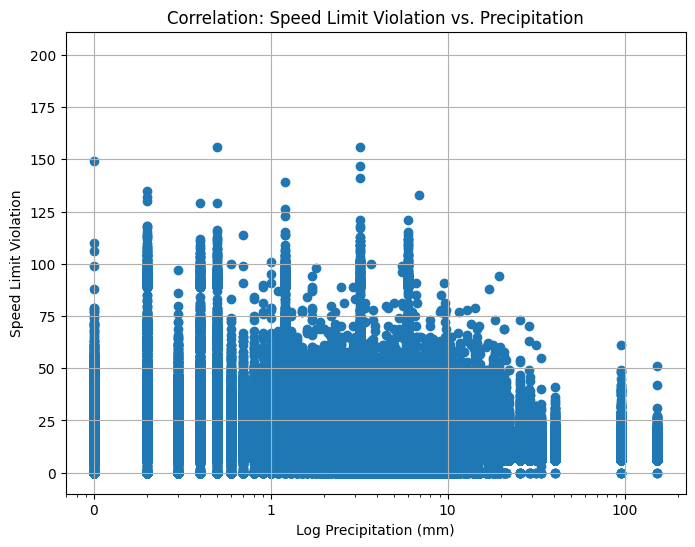

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['prcp'], merged_data['excessive_speed'])
plt.title('Correlation: Speed Limit Violation vs. Precipitation')
plt.xlabel('Log Precipitation (mm)')
plt.ylabel('Speed Limit Violation')
plt.grid(True)

# Set x-axis scale to logarithmic
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())

plt.show()

All data is visual in the graph, however logarithmic data does not visualize the correlation well.

If we do not use log, however, outliers distort the diagram:

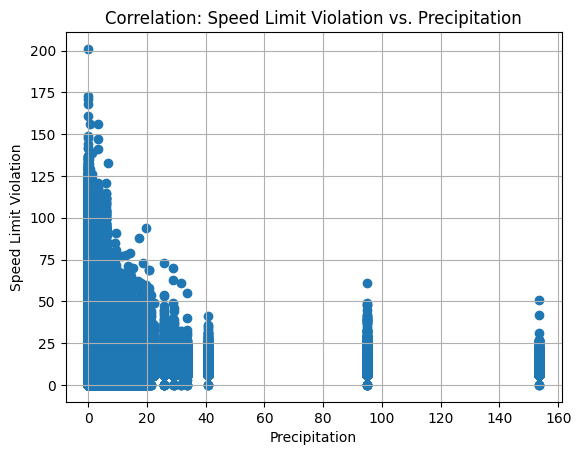

In [55]:
plt.scatter(merged_data['prcp'], merged_data['excessive_speed'])
m, b = np.polyfit(merged_data['prcp'], merged_data['excessive_speed'], 1)
plt.plot(merged_data['prcp'], m * merged_data['prcp'] + b, color='red')
plt.title('Correlation: Speed Limit Violation vs. Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Speed Limit Violation')
plt.grid(True)
plt.show()


Correlation Visualization using purified data:

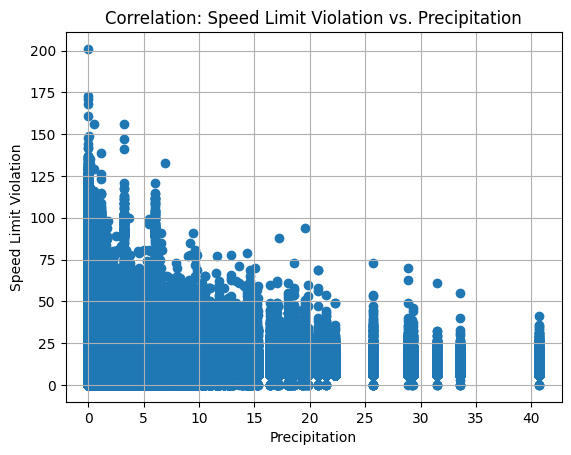

In [56]:
# Filtering of outliers (99% Interquartile range)
Q1 = np.percentile(merged_data['prcp'], 1)
Q3 = np.percentile(merged_data['prcp'], 99)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = merged_data[(merged_data['prcp'] >= lower_bound) & (merged_data['prcp'] <= upper_bound)]

# Scatter plot of the filtered data
plt.scatter(filtered_data['prcp'], filtered_data['excessive_speed'])
m, b = np.polyfit(filtered_data['prcp'], filtered_data['excessive_speed'], 1)
plt.plot(filtered_data['prcp'], m * filtered_data['prcp'] + b, color='red')
plt.title('Correlation: Speed Limit Violation vs. Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Speed Limit Violation')
plt.grid(True)
plt.show()
